In [25]:
# importa as bibliotecas que serão usadas
import pandas as pd
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [46]:
# ler a base de dados usada.
series = pd.read_csv('../data/champagne_sales.csv', header=0, index_col=0, parse_dates=True).squeeze()
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

### Mês anterior

In [40]:
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 1

In [41]:
# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

history

[2815]

In [47]:
# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]
test

[2672,
 2755,
 2721,
 2946,
 3036,
 2282,
 2212,
 2922,
 4301,
 5764,
 7312,
 2541,
 2475,
 3031,
 3266,
 3776,
 3230,
 3028,
 1759,
 3595,
 4474,
 6838,
 8357,
 3113,
 3006,
 4047,
 3523,
 3937,
 3986,
 3260,
 1573,
 3528,
 5211,
 7614,
 9254,
 5375,
 3088,
 3718,
 4514,
 4520,
 4539,
 3663,
 1643,
 4739,
 5428,
 8314,
 10651,
 3633,
 4292,
 4154,
 4121,
 4647,
 4753,
 3965,
 1723,
 5048,
 6922,
 9858,
 11331,
 4016,
 3957,
 4510,
 4276,
 4968,
 4677,
 3523,
 1821,
 5222,
 6872,
 10803,
 13916,
 2639,
 2899,
 3370,
 3740,
 2927,
 3986,
 4217,
 1738,
 5221,
 6424,
 9842,
 13076,
 3934,
 3162,
 4286,
 4676,
 5010,
 4874,
 4633,
 1659,
 5951,
 6981,
 9851,
 12670,
 4348,
 3564,
 4577,
 4788,
 4618,
 5312,
 4298,
 1413,
 5877]

In [52]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 1

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2815.000000, Valor real=2672.000000
Valor predito=2672.000000, Valor real=2755.000000
Valor predito=2755.000000, Valor real=2721.000000
Valor predito=2721.000000, Valor real=2946.000000
Valor predito=2946.000000, Valor real=3036.000000
Valor predito=3036.000000, Valor real=2282.000000
Valor predito=2282.000000, Valor real=2212.000000
Valor predito=2212.000000, Valor real=2922.000000
Valor predito=2922.000000, Valor real=4301.000000
Valor predito=4301.000000, Valor real=5764.000000
Valor predito=5764.000000, Valor real=7312.000000
Valor predito=7312.000000, Valor real=2541.000000
Valor predito=2541.000000, Valor real=2475.000000
Valor predito=2475.000000, Valor real=3031.000000
Valor predito=3031.000000, Valor real=3266.000000
Valor predito=3266.000000, Valor real=3776.000000
Valor predito=3776.000000, Valor real=3230.000000
Valor predito=3230.000000, Valor real=3028.000000
Valor predito=3028.000000, Valor real=1759.000000
Valor predito=1759.000000, Valor real=3595.000000


In [53]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))      

# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)                         

Métrica RMSE: 2638.357


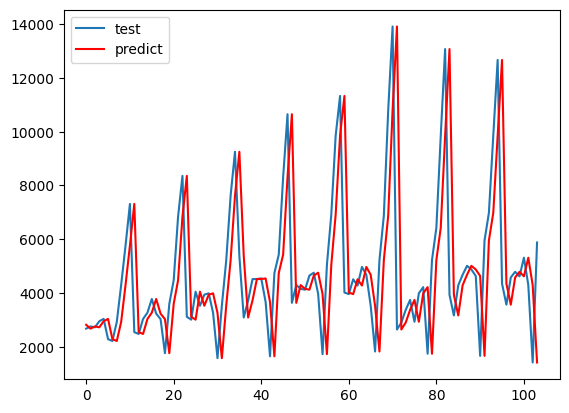

In [54]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.legend(['test', 'predict'])
plt.show()

### Rolling Window

In [36]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [37]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))      

# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)                         

Métrica RMSE: 2960.299


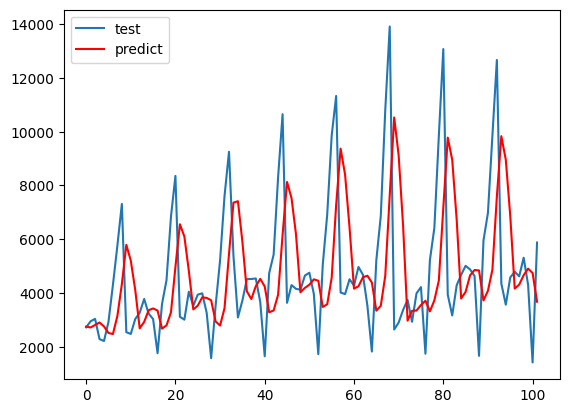

In [38]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.legend(['test', 'predict'])
plt.show()